In [110]:
# Simulates Ising model using Monte Carlo techniques
# By Amol Deshmukh and Areg Ghazaryan, The City College of New York, June 2018

In [111]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [112]:
# Total energy of a configuration
def total_energy(state):
	energy=0
	for i in range(N):
		for j in range(N):
			energy+=state[i,j]*(state[(i+1)%N,j]+state[i,(j+1)%N])
	return energy		

# Local energy change in the system after a spin flip
def diff_energy(state,i,j):
	return 2*state[i,j]*(state[(i-1)%N,j]+state[i,(j-1)%N]+state[(i+1)%N,j]+state[i,(j+1)%N]) 	

# Monte Carlo update	
def update(state):
	energy[0]        = total_energy(state)                             # Energy of the initial state
	magnetization[0] = state.sum()                                     # Magnetization of the initial state
	for k in range(N_sweeps):		
		i = np.random.randint(N)
		j = np.random.randint(N)
		delta_E = diff_energy(state,i,j)                               # Change in energy
		if delta_E<0 or np.exp(-delta_E/temp)>np.random.uniform(0,1):
			state[i,j] *= -1                                           # Metropolis step
			magnetization[k] = magnetization[k-1]+2*state[i,j]
			energy[k]        = energy[k-1]+delta_E
		else: 
			magnetization[k] = magnetization[k-1]
			energy[k]        = energy[k-1]

In [113]:
# System parameters
N        = 2**7              # Number of lattice sites
N_sweeps = 10**7             # Number of Monte Carlo sweeps
temp     = 1.0               # Temperature

# Intial state
state = 2*np.random.randint(2, size=(N,N))-1

# Magnetization/energy value holder
magnetization = np.zeros(N_sweeps)
energy        = np.zeros(N_sweeps)

# Monte Carlo updates
update(state)

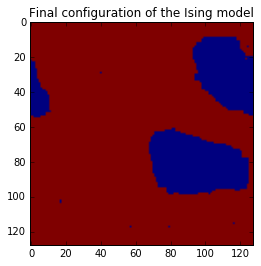

In [114]:
# Snapshot of the configuration at the end of Monte Carlo simulation
plt.imshow(state)
plt.title('Final configuration of the Ising model')
plt.show()

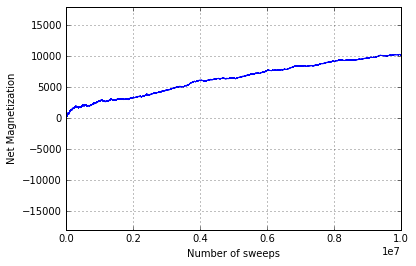

In [115]:
# Net Magnetization as a functions of number of Monte Carlo sweeps
plt.plot(magnetization)
plt.xlabel('Number of sweeps')
plt.ylabel('Net Magnetization')
plt.ylim(-1.1*N**2,1.1*N**2)
plt.grid(True)
plt.show()

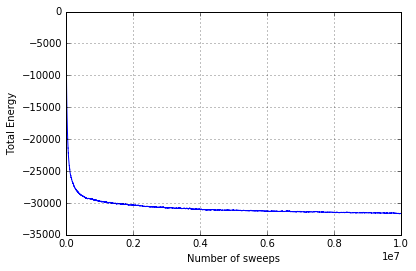

In [116]:
# Net Energy as a functions of number of Monte Carlo sweeps
plt.plot(energy)
plt.xlabel('Number of sweeps')
plt.ylabel('Total Energy')
plt.grid(True)
plt.show()

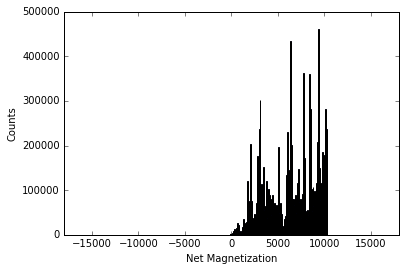

In [117]:
# Histogram for 'Net Magnetization'
plt.hist(magnetization,bins=100)
plt.xlim(-1.1*N**2,1.1*N**2)
plt.xlabel('Net Magnetization')
plt.ylabel('Counts')
plt.show()